## Problem statement:

So this week we have a problem coming to us from the medical community. We're looking specifically at a diabetes study. And the problem is hospital readmission.

Now we don't want people in hospitals. We want them to be well. And we certainly don't want them to be readmitted. This comes at a huge cost to the patient in terms of bills, lost wages, strain on their family and whatnot. So our goal is no readmission.


***Predict readmission of the patient within 30 days of initial hospitalization.***


Import libraries 

In [1]:
#for data
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


# Display all columns 
pd.options.display.max_columns = None
## for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from yellowbrick.classifier import ClassificationReport

### Import Dataset 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy2/data/diabetic_data.csv')

In [3]:
metadata=pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy2/data/IDs_mapping.csv')

In [ ]:
df.head()

In [5]:
#metadata

In [ ]:
df.info()

 #### Clean the Dataset 

In [7]:
categorical_features = ['race',
'gender',
'age',
'weight',
'admission_type_id',
'discharge_disposition_id',
'admission_source_id',
'time_in_hospital',
'payer_code',
'medical_specialty',
'num_lab_procedures',
'num_procedures',
'num_medications',
'number_outpatient',
'number_emergency',
'number_inpatient',
'diag_1',
'diag_2',
'diag_3',
'number_diagnoses',
'max_glu_serum',
'A1Cresult',
'metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone',
'change',
'diabetesMed',
]

In [8]:
df.isna().any().any()
df.isna().sum().sum()


0

In [9]:
print(df['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [10]:
print(df['gender'].value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


In [11]:
print(df['age'].value_counts())

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [12]:
print(df['weight'].value_counts())

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


In [13]:
print(df['diabetesMed'].value_counts())

Yes    78363
No     23403
Name: diabetesMed, dtype: int64


In [14]:
print(df['number_diagnoses'].value_counts())

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64


In [20]:
#df['readmitted'].unique()
print(df['readmitted'].value_counts())


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


### EDA

In [16]:
def categorical_explanatory_binary_response_chart(chart_df, field, target, toggle=False, ):
    # the toggle switches which class is the "baseline" of the line chart
    drop_index = 2
    if toggle:
        drop_index = 1
    
    field_count  = chart_df[field].value_counts()
    field_count_df = field_count.to_frame()
    field_count_df.columns = ['count']
    
    field_target_pct = pd.crosstab(chart_df[field], chart_df[target], normalize='index') * 100
    field_target_pct = field_target_pct.reset_index()
    field_target_pct = field_target_pct.drop(field_target_pct.columns[-drop_index],axis=1)
    
    field_target_data = field_target_pct.merge(field_count_df, right_index=True, left_on=field).sort_values('count', ascending=False).reset_index(drop=True)
    
    print(field_target_data)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel(field)
    ax = sns.barplot(field_target_data[field], field_target_data['count'], alpha=0.8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_ylabel('count (bars)')
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=field_target_data[field], y=field_target_data.iloc[:, -2], color='black', legend=False)
    ax2.set_ylabel('% {t} (line)'.format(t = target))
    plt.show()

              race        <30         NO  count
0        Caucasian  11.290556  53.066400  76099
1  AfricanAmerican  11.218116  54.247788  19210
2                ?   8.271007  68.059833   2273
3         Hispanic  10.407462  58.075601   2037
4            Other   9.628154  60.756972   1506
5            Asian  10.140406  64.742590    641


<Figure size 720x20304 with 0 Axes>

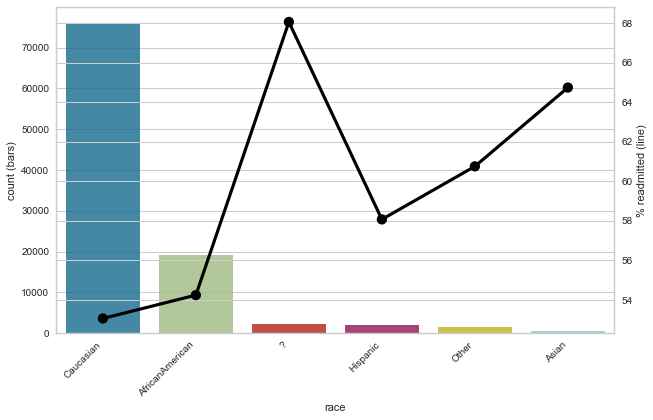

            gender        <30          NO  count
0           Female  11.245156   53.078160  54708
1             Male  11.061524   54.878334  47055
2  Unknown/Invalid   0.000000  100.000000      3


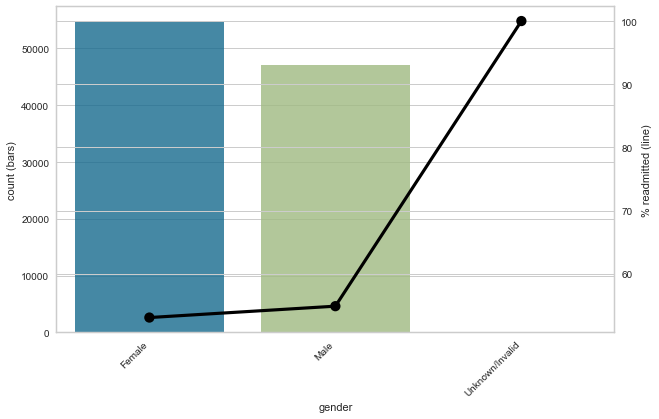

        age        <30         NO  count
0   [70-80)  11.773055  51.879699  26068
1   [60-70)  11.128408  53.747276  22483
2   [50-60)   9.666203  56.044274  17256
3   [80-90)  12.083503  51.729953  17197
4   [40-50)  10.604027  55.549819   9685
5   [30-40)  11.231788  57.324503   3775
6  [90-100)  11.099177  59.971357   2793
7   [20-30)  14.242607  54.978877   1657
8   [10-20)   5.788712  61.794501    691
9    [0-10)   1.863354  81.987578    161


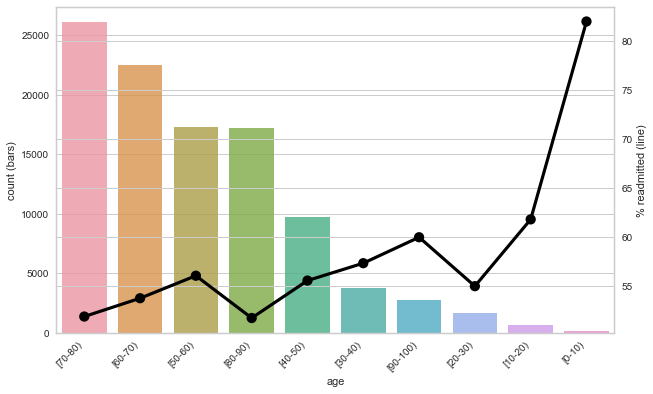

      weight        <30         NO  count
0          ?  11.159695  54.311193  98569
1   [75-100)  11.452096  38.922156   1336
2    [50-75)  11.705686  44.927536    897
3  [100-125)  10.720000  42.560000    625
4  [125-150)   8.275862  44.137931    145
5    [25-50)   8.247423  48.453608     97
6     [0-25)  16.666667  18.750000     48
7  [150-175)   8.571429  45.714286     35
8  [175-200)   9.090909  45.454545     11
9       >200   0.000000   0.000000      3


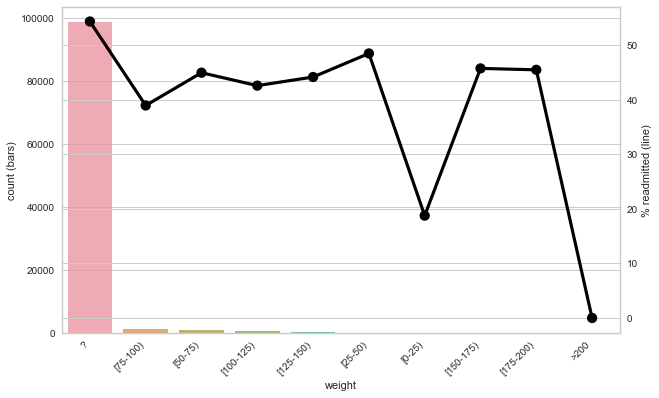

   admission_type_id        <30          NO  count
0                  1  11.522504   52.713465  53990
1                  3  10.392708   59.155228  18869
2                  2  11.179654   53.906926  18480
3                  6  11.075411   46.758647   5291
4                  5  10.344828   53.688610   4785
5                  8   8.437500   65.312500    320
6                  7   0.000000  100.000000     21
7                  4  10.000000   70.000000     10


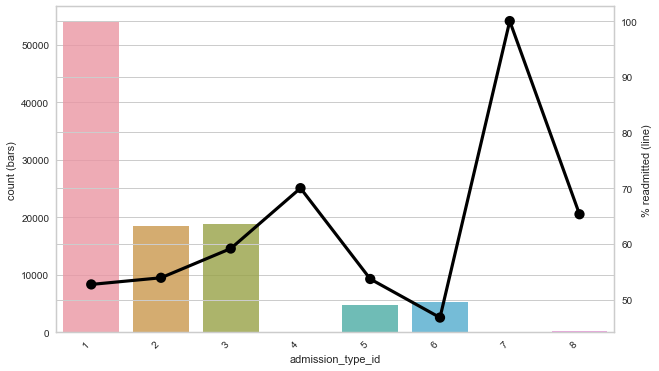

    discharge_disposition_id        <30          NO  count
0                          1   9.300395   54.977255  60234
1                          3  14.662462   50.107496  13954
2                          6  12.695706   45.744846  12902
3                         18  12.435654   59.739908   3691
4                          2  16.071429   52.537594   2128
5                         22  27.696939   46.261917   1993
6                         11   0.000000  100.000000   1642
7                          5  20.861486   49.577703   1184
8                         25   9.302326   52.679474    989
9                          4  12.760736   53.128834    815
10                         7  14.446228   50.080257    623
11                        23   7.281553   57.766990    412
12                        13   4.761905   86.215539    399
13                        14   6.451613   91.666667    372
14                        28  36.690647   38.848921    139
15                         8  13.888889   50.925926    1

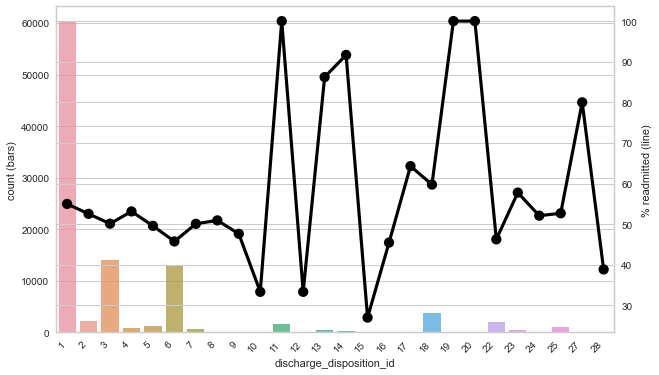

    admission_source_id        <30          NO  count
0                     7  11.688176   50.626152  57494
1                     1  10.586843   56.807035  29565
2                    17  10.411444   53.340215   6781
3                     4   9.695639   69.218701   3187
4                     6   9.363958   73.056537   2264
5                     2  10.054348   61.865942   1104
6                     5  11.812865   60.584795    855
7                     3  15.508021   53.475936    187
8                    20  13.664596   36.024845    161
9                     9  10.400000   76.800000    125
10                    8  12.500000   62.500000     16
11                   22  16.666667   58.333333     12
12                   10   0.000000   75.000000      8
13                   11   0.000000  100.000000      2
14                   14   0.000000  100.000000      2
15                   25   0.000000  100.000000      2
16                   13   0.000000  100.000000      1


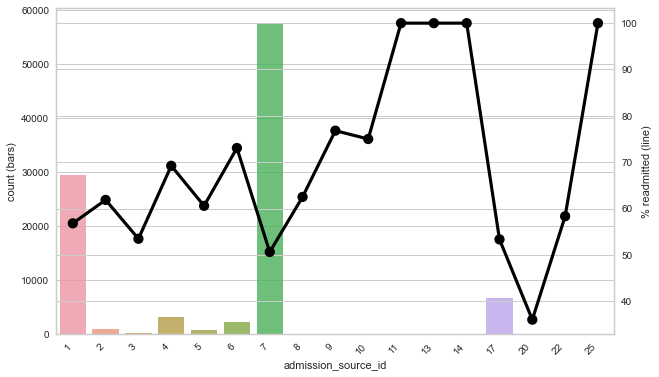

    time_in_hospital        <30         NO  count
0                  3  10.666817  55.063077  17756
1                  2   9.939619  55.695541  17224
2                  1   8.178491  60.353322  14208
3                  4  11.806952  51.824188  13924
4                  5  12.030905  51.986755   9966
5                  6  12.587876  50.868815   7539
6                  7  12.834955  50.930193   5859
7                  8  14.233660  49.578684   4391
8                  9  13.724184  49.666889   3002
9                 10  14.346712  49.871904   2342
10                11  10.512129  51.805930   1855
11                12  13.328729  50.897790   1448
12                13  12.314050  52.892562   1210
13                14  12.955854  50.767754   1042


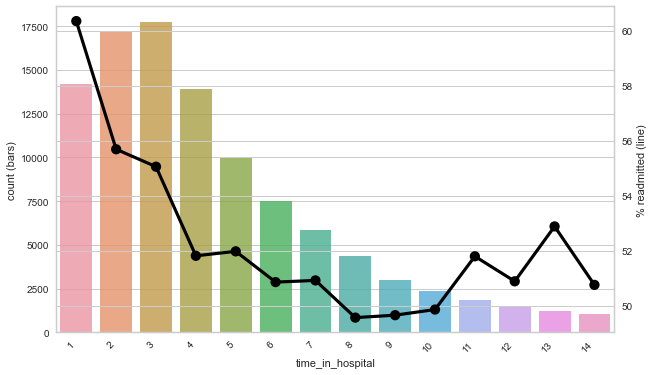

   payer_code        <30          NO  count
0           ?  11.493939   54.155902  40256
1          MC  11.745122   51.317858  32439
2          HM  10.264584   52.757412   6274
3          SP  10.185740   52.486519   5007
4          BC   9.151450   62.900107   4655
5          MD  11.778029   52.576444   3532
6          CP   8.448480   60.718516   2533
7          UN   9.272876   62.295752   2448
8          CM  10.221993   55.653072   1937
9          OG  13.165537   54.598258   1033
10         PO   7.432432   68.243243    592
11         DM  11.657559   48.269581    549
12         CH   8.904110   68.493151    146
13         WC   3.703704   78.518519    135
14         OT   7.368421   52.631579     95
15         MP  11.392405   39.240506     79
16         SI  12.727273   56.363636     55
17         FR   0.000000  100.000000      1


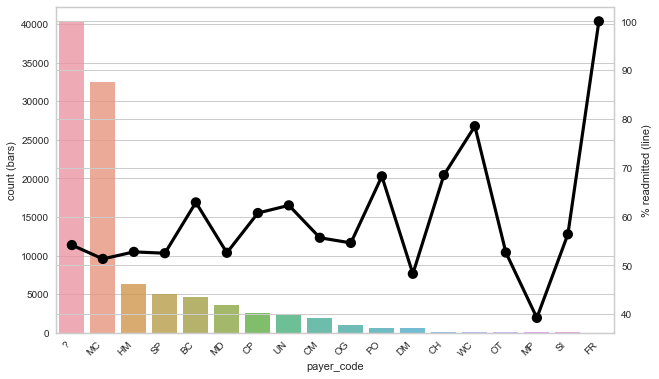

         medical_specialty        <30          NO  count
0                        ?  11.573805   51.956996  49949
1         InternalMedicine  11.247011   56.481039  14635
2         Emergency/Trauma  11.183080   49.081295   7565
3   Family/GeneralPractice  11.868280   52.338710   7440
4               Cardiology   7.940957   57.436472   5352
..                     ...        ...         ...    ...
68              Proctology   0.000000  100.000000      1
69    Psychiatry-Addictive   0.000000  100.000000      1
70         Neurophysiology   0.000000  100.000000      1
71          SportsMedicine   0.000000    0.000000      1
72            Perinatology   0.000000  100.000000      1

[73 rows x 4 columns]


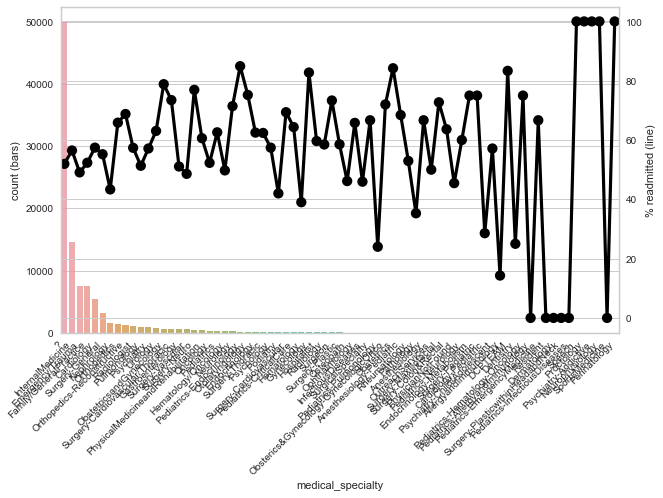

     num_lab_procedures         <30          NO  count
0                     1    9.413965   59.226933   3208
1                    43   12.446505   52.318117   2804
2                    44   11.899038   53.125000   2496
3                    45   11.826599   53.493266   2376
4                    38   10.167194   57.071848   2213
..                  ...         ...         ...    ...
113                 120    0.000000  100.000000      1
114                 121    0.000000  100.000000      1
115                 126    0.000000  100.000000      1
116                 129    0.000000    0.000000      1
117                 132  100.000000    0.000000      1

[118 rows x 4 columns]


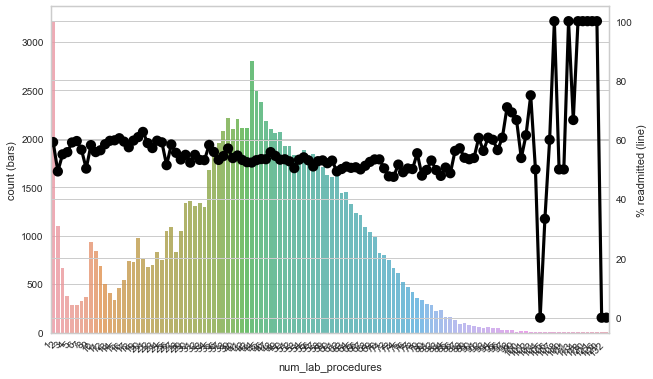

   num_procedures        <30         NO  count
0               0  11.077767  51.736260  46652
1               1  12.207116  53.919583  20742
2               2  11.181883  55.642054  12717
3               3  10.685164  57.555861   9443
4               6   9.588212  58.720226   4954
5               4  11.028708  55.980861   4180
6               5   9.421702  57.959714   3078


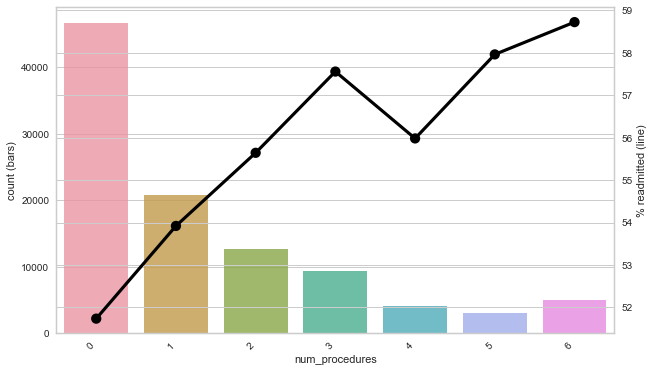

    num_medications         <30          NO  count
0                13   10.992442   52.481104   6086
1                12   10.776149   53.680879   6004
2                11   10.371009   54.702330   5795
3                15   11.654006   51.847376   5792
4                14   10.758717   53.250394   5707
..              ...         ...         ...    ...
70               70   50.000000    0.000000      2
71               75    0.000000  100.000000      2
72               74    0.000000  100.000000      1
73               79    0.000000  100.000000      1
74               81  100.000000    0.000000      1

[75 rows x 4 columns]


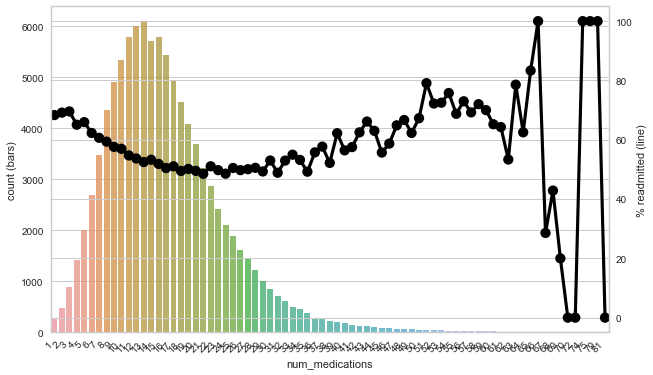

    number_outpatient         <30         NO  count
0                   0   10.674256  56.349160  85027
1                   1   13.923014  42.623143   8547
2                   2   13.745131  39.899833   3594
3                   3   12.291871  42.556317   2042
4                   4   15.104641  41.219290   1099
5                   5   11.819887  42.589118    533
6                   6   13.201320  35.973597    303
7                   7   15.483871  30.967742    155
8                   8    5.102041  54.081633     98
9                   9   15.662651  38.554217     83
10                 10    8.771930  29.824561     57
11                 11   14.285714  28.571429     42
12                 13   19.354839  35.483871     31
13                 12   20.000000  30.000000     30
14                 14   17.857143  21.428571     28
15                 15   10.000000  20.000000     20
16                 16    0.000000  46.666667     15
17                 17   12.500000  50.000000      8
18          

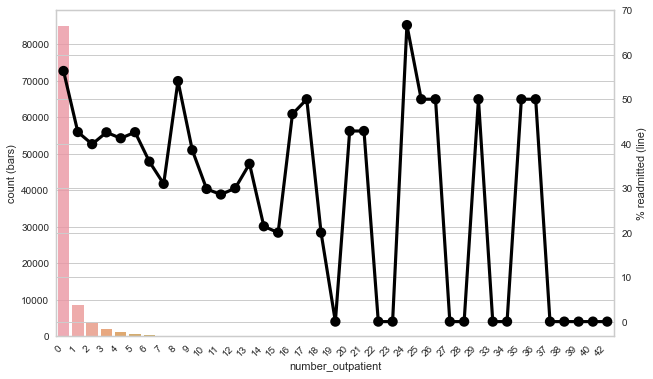

    number_emergency         <30          NO  count
0                  0   10.474315   56.105684  90383
1                  1   14.354566   40.706005   7677
2                  2   18.266405   32.908913   2042
3                  3   20.275862   28.137931    725
4                  4   30.748663   18.449198    374
5                  5   24.479167   19.791667    192
6                  6   23.404255   15.957447     94
7                  7   26.027397    9.589041     73
8                  8   32.000000   18.000000     50
9                 10   35.294118    0.000000     34
10                 9   36.363636    9.090909     33
11                11   21.739130   13.043478     23
12                13   33.333333    8.333333     12
13                12   20.000000   20.000000     10
14                22   50.000000    0.000000      6
15                18   20.000000    0.000000      5
16                16   40.000000   20.000000      5
17                19   50.000000    0.000000      4
18          

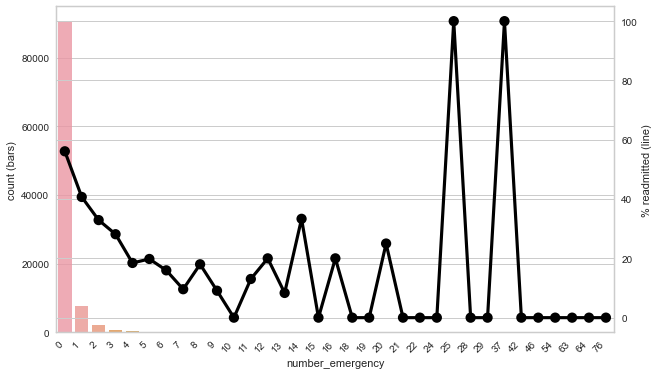

    number_inpatient         <30         NO  count
0                  0    8.437084  61.505249  67630
1                  1   12.924543  45.238461  19521
2                  2   17.433254  35.064763   7566
3                  3   20.287306  30.284374   3411
4                  4   23.612824  25.770654   1622
5                  5   31.403941  19.950739    812
6                  6   34.583333  15.833333    480
7                  7   35.447761  19.029851    268
8                  8   44.370861   9.271523    151
9                  9   42.342342  11.711712    111
10                10   42.622951  14.754098     61
11                11   67.346939   0.000000     49
12                12   50.000000  11.764706     34
13                13   50.000000  10.000000     20
14                14   40.000000   0.000000     10
15                15  100.000000   0.000000      9
16                16   33.333333  33.333333      6
17                19   50.000000   0.000000      2
18                17  100.00000

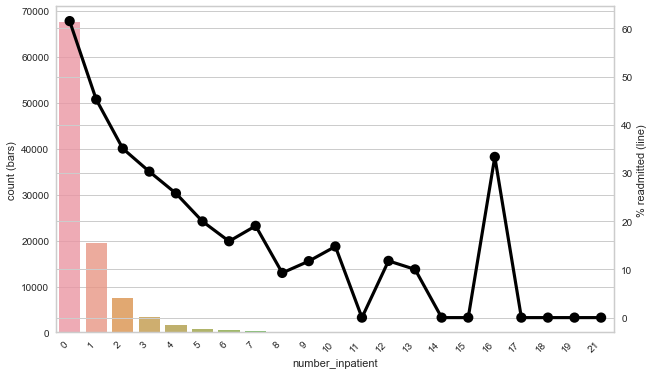

    diag_1        <30          NO  count
0      428  14.106674   40.877295   6862
1      414   9.041179   58.668895   6581
2      786   7.246016   57.445219   4016
3      410  10.320974   60.210293   3614
4      486   8.950969   52.023945   3508
..     ...        ...         ...    ...
712    832   0.000000  100.000000      1
713    833   0.000000  100.000000      1
714    919   0.000000    0.000000      1
715    834   0.000000  100.000000      1
716     10   0.000000  100.000000      1

[717 rows x 4 columns]


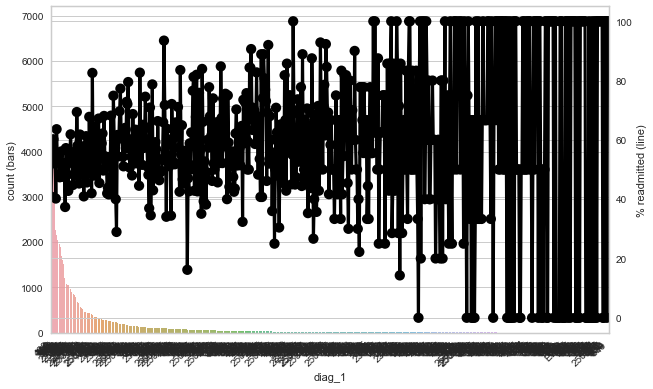

    diag_2        <30          NO  count
0      276  11.996445   52.577014   6752
1      428  12.638847   47.132993   6662
2      250   7.346401   64.981057   6071
3      427  11.179508   52.501986   5036
4      401   7.173448   65.123126   3736
..     ...        ...         ...    ...
744    388   0.000000    0.000000      1
745    994   0.000000    0.000000      1
746    800   0.000000  100.000000      1
747     46   0.000000  100.000000      1
748    811   0.000000    0.000000      1

[749 rows x 4 columns]


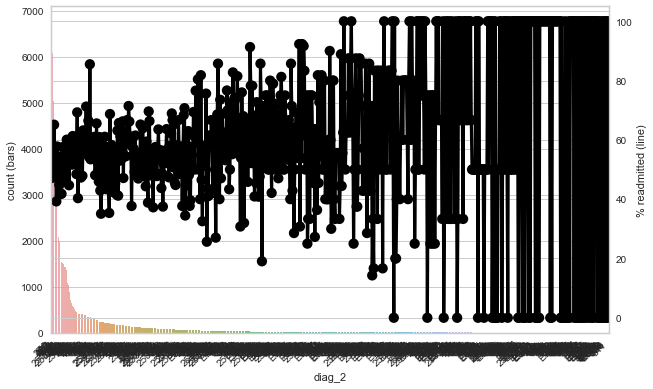

    diag_3         <30          NO  count
0      250    8.515794   60.623107  11555
1      401    8.300157   61.720352   8289
2      276   11.652174   53.739130   5175
3      428   12.235088   46.864759   4577
4      427   11.605563   50.366625   3955
..     ...         ...         ...    ...
785    972    0.000000  100.000000      1
786   E886    0.000000  100.000000      1
787    980  100.000000    0.000000      1
788    448    0.000000    0.000000      1
789    744  100.000000    0.000000      1

[790 rows x 4 columns]


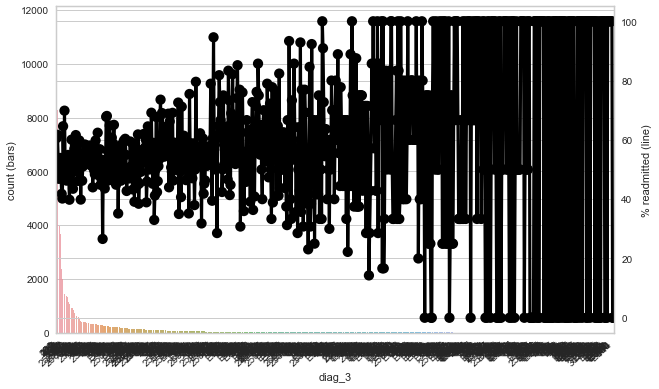

    number_diagnoses        <30         NO  count
0                  9  12.380240  49.415855  49474
1                  5   9.154744  64.548407  11393
2                  8  11.812359  52.411454  10616
3                  7  10.766862  53.324353  10393
4                  6  10.412361  56.155890  10161
5                  4   8.253567  62.741557   5537
6                  3   7.372134  65.714286   2835
7                  2   6.060606  67.155425   1023
8                  1   5.936073  76.255708    219
9                 16   8.888889  60.000000     45
10                10  17.647059  52.941176     17
11                13  18.750000  43.750000     16
12                11  27.272727  27.272727     11
13                15  20.000000  50.000000     10
14                12  11.111111  55.555556      9
15                14  14.285714  42.857143      7


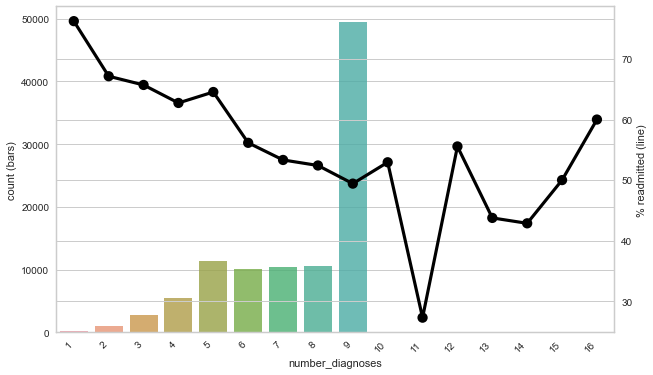

  max_glu_serum        <30         NO  count
0          None  11.093134  54.049990  96420
1          Norm  11.359261  54.562957   2597
2          >200  12.457912  51.851852   1485
3          >300  14.319620  44.462025   1264


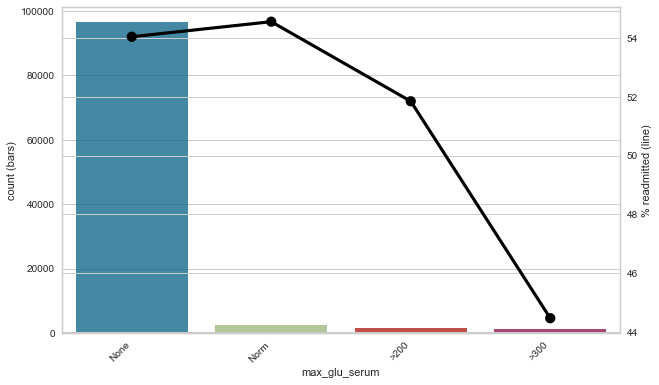

  A1Cresult        <30         NO  count
0      None  11.423278  53.478548  84748
1        >8   9.870983  54.819864   8216
2      Norm   9.659319  58.296593   4990
3        >7  10.047219  55.849948   3812


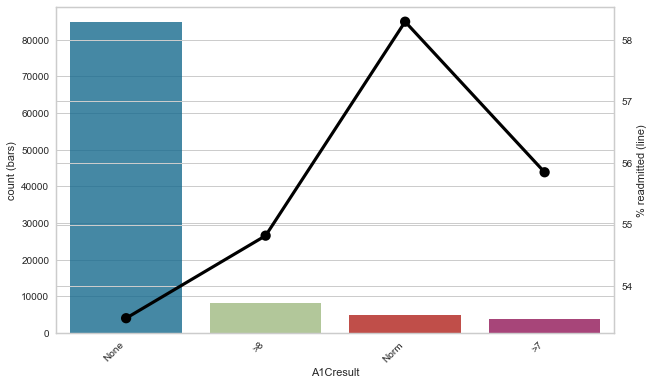

  metformin        <30         NO  count
0        No  11.516545  53.218470  81778
1    Steady   9.713289  56.660853  18346
2        Up   8.247423  59.231490   1067
3      Down  12.000000  54.956522    575


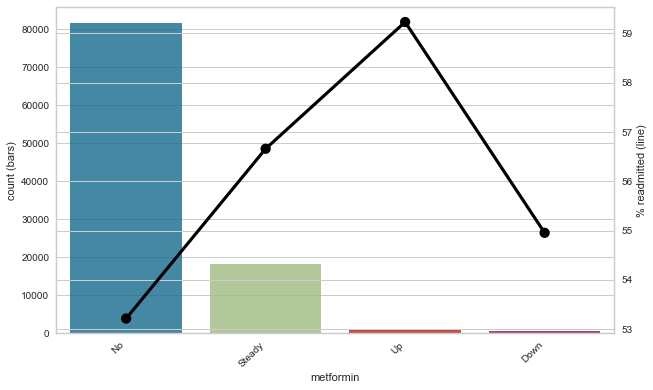

  repaglinide        <30         NO   count
0          No  11.126742  54.047313  100227
1      Steady  13.150289  44.364162    1384
2          Up  18.181818  51.818182     110
3        Down   6.666667  51.111111      45


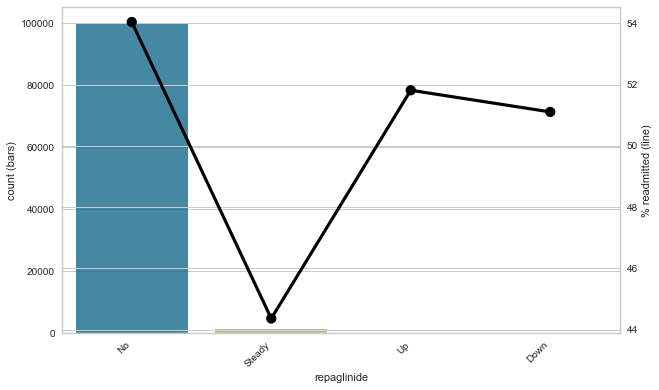

  nateglinide        <30         NO   count
0          No  11.158386  53.929727  101063
1      Steady  11.676647  51.197605     668
2          Up   4.166667  54.166667      24
3        Down   9.090909  54.545455      11


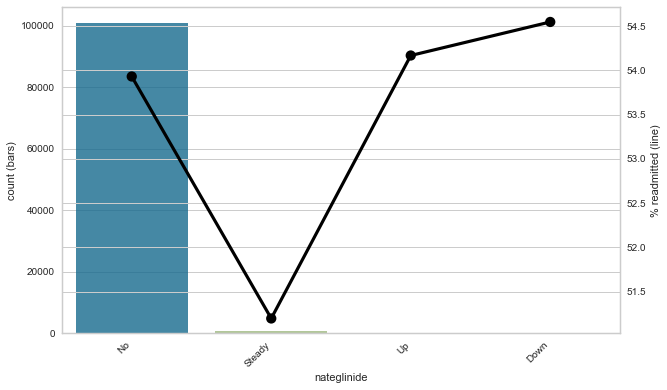

  chlorpropamide        <30          NO   count
0             No  11.164437   53.911290  101680
1         Steady   6.329114   56.962025      79
2             Up   0.000000   16.666667       6
3           Down   0.000000  100.000000       1


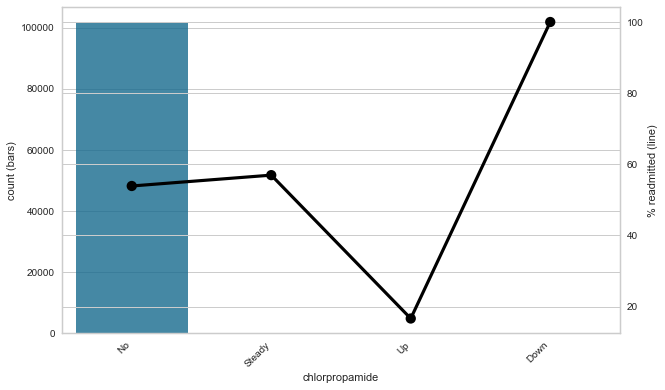

  glimepiride        <30         NO  count
0          No  11.210976  53.958064  96575
1      Steady  10.021413  52.783726   4670
2          Up  11.314985  57.492355    327
3        Down  12.886598  52.061856    194


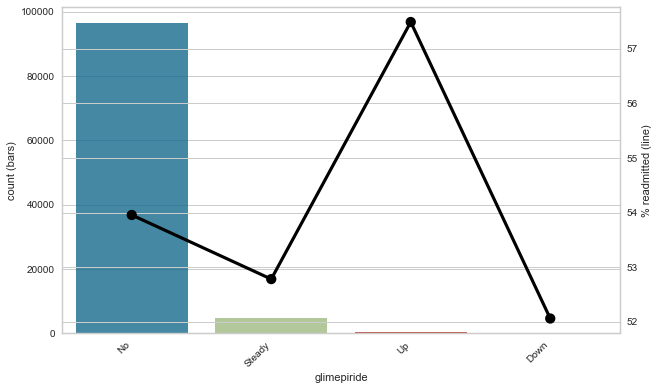

  acetohexamide        <30         NO   count
0            No  11.160026  53.912445  101765
1        Steady   0.000000   0.000000       1


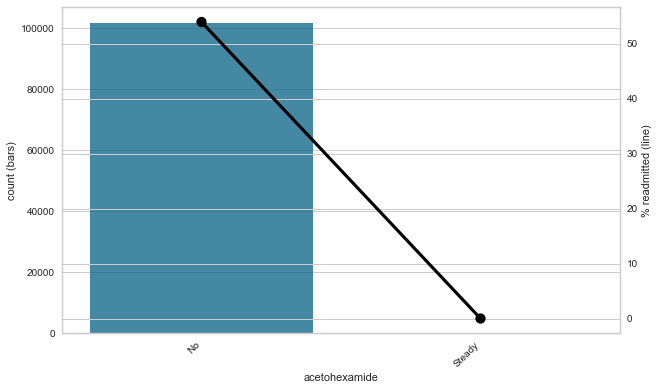

  glipizide        <30         NO  count
0        No  11.119219  54.288280  89080
1    Steady  11.165903  51.558647  11356
2        Up  12.857143  50.000000    770
3      Down  15.178571  47.142857    560


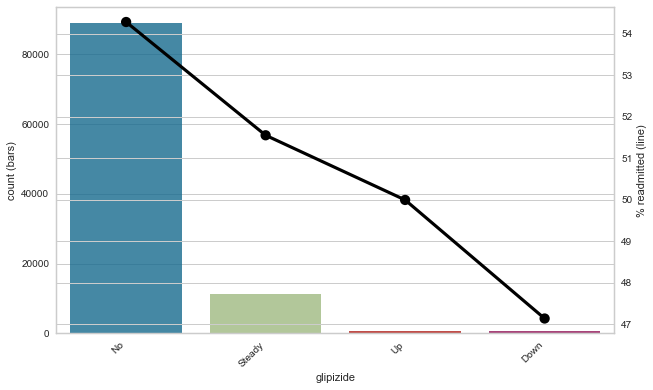

  glyburide        <30         NO  count
0        No  11.221959  53.847842  91116
1    Steady  10.728920  54.539573   9274
2        Up  10.467980  55.788177    812
3      Down   9.219858  51.241135    564


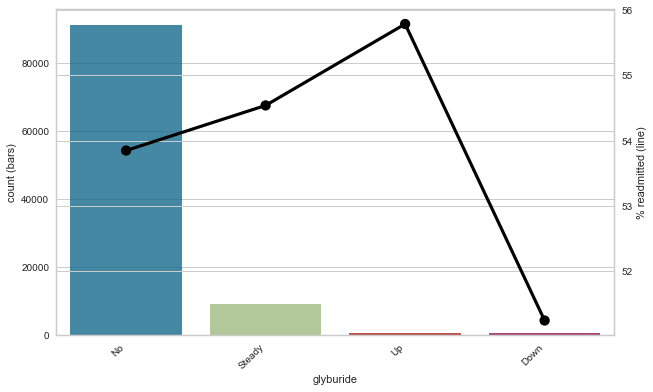

  tolbutamide        <30         NO   count
0          No  11.161456  53.909360  101743
1      Steady   4.347826  65.217391      23


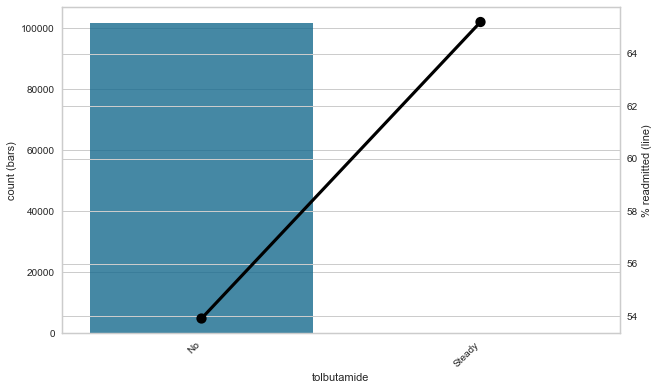

  pioglitazone        <30         NO  count
0           No  11.206294  54.074631  94438
1       Steady  10.421445  52.021216   6976
2           Up  12.393162  48.290598    234
3         Down  15.254237  46.610169    118


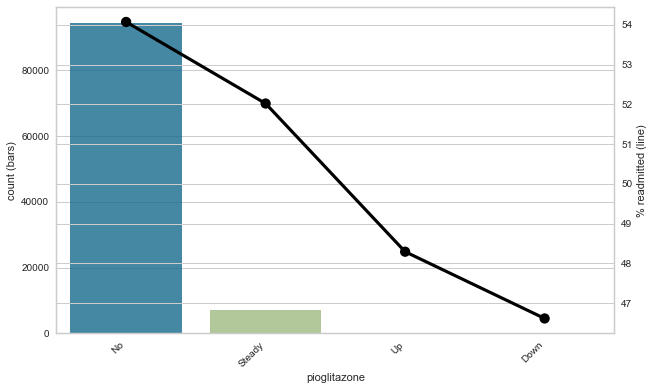

  rosiglitazone        <30         NO  count
0            No  11.207430  54.059182  95401
1        Steady  10.508197  51.213115   6100
2            Up  10.674157  60.112360    178
3          Down   5.747126  68.965517     87


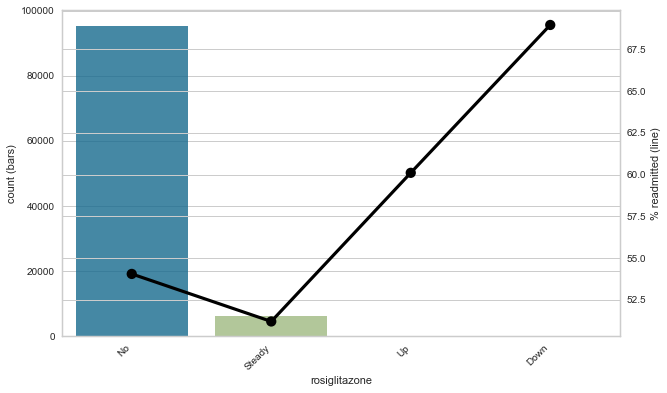

  acarbose        <30         NO   count
0       No  11.166197  53.952374  101458
1   Steady   8.474576  40.677966     295
2       Up  20.000000  40.000000      10
3     Down  33.333333  33.333333       3


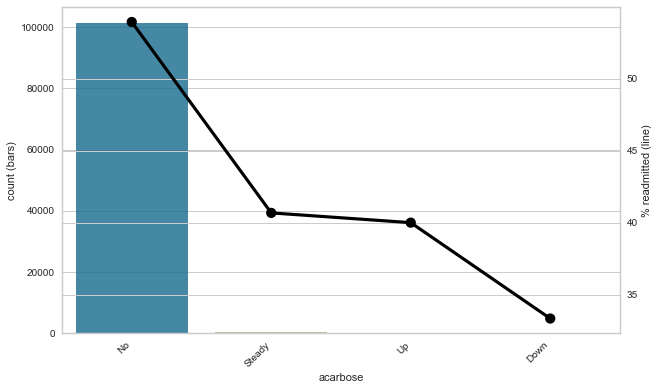

  miglitol        <30         NO   count
0       No  11.160153  53.918292  101728
1   Steady   6.451613  41.935484      31
2     Down  40.000000   0.000000       5
3       Up   0.000000  50.000000       2


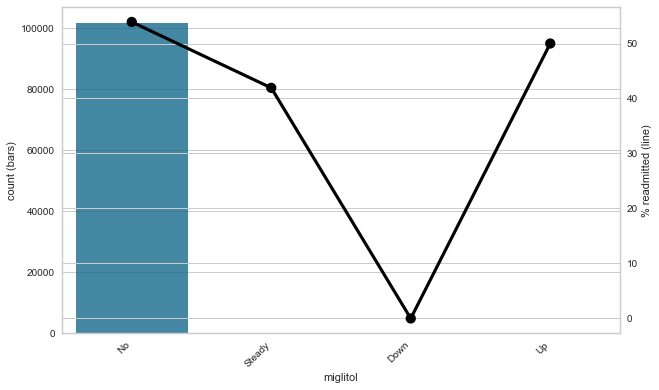

  troglitazone        <30         NO   count
0           No  11.160245  53.912522  101763
1       Steady   0.000000  33.333333       3


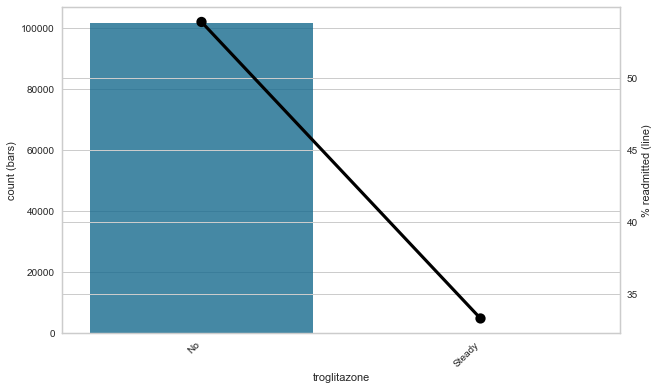

  tolazamide        <30         NO   count
0         No  11.161245  53.907026  101727
1     Steady   7.894737  68.421053      38
2         Up   0.000000   0.000000       1


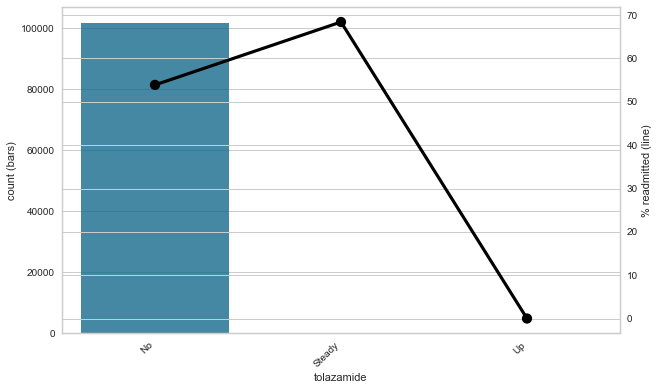

  examide        <30         NO   count
0      No  11.159916  53.911916  101766


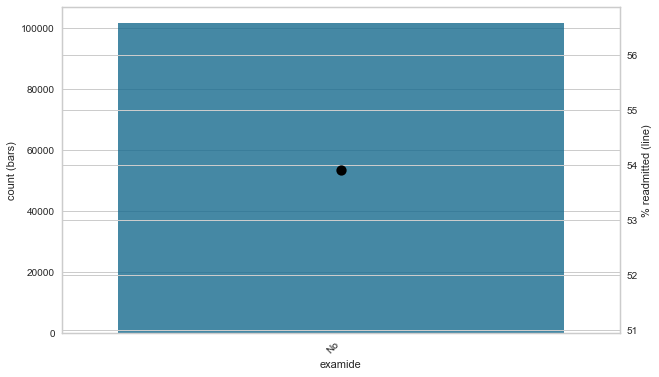

  citoglipton        <30         NO   count
0          No  11.159916  53.911916  101766


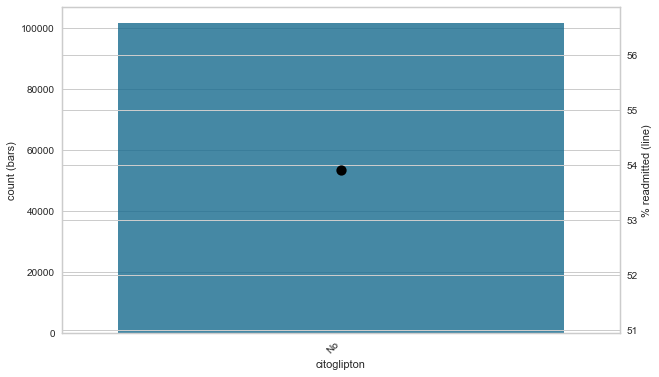

  insulin        <30         NO  count
0      No  10.037355  56.302893  47383
1  Steady  11.128400  54.893189  30849
2    Down  13.897528  47.209036  12218
3      Up  12.990456  48.462354  11316


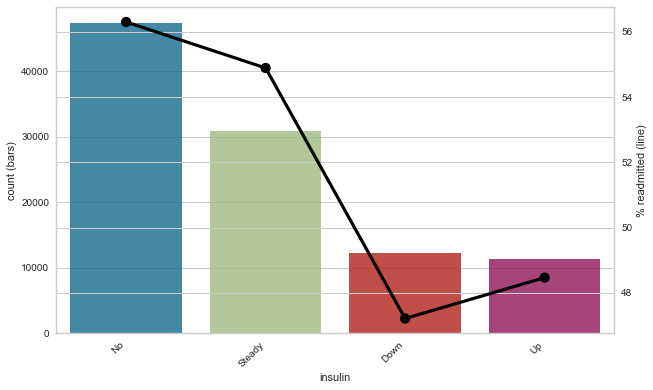

  glyburide-metformin        <30         NO   count
0                  No  11.160697  53.922422  101060
1              Steady  11.127168  51.734104     692
2                  Up   0.000000  87.500000       8
3                Down  16.666667  83.333333       6


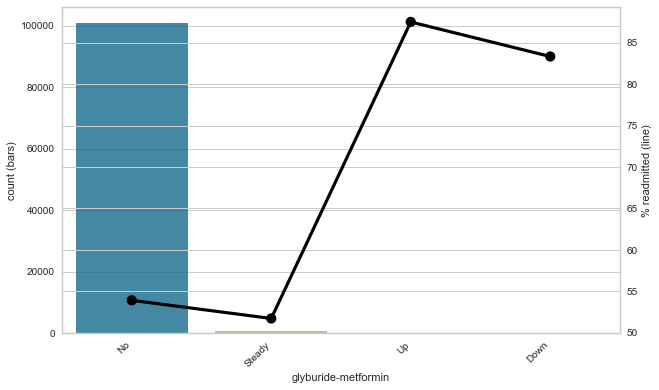

  glipizide-metformin        <30         NO   count
0                  No  11.160359  53.913890  101753
1              Steady   7.692308  38.461538      13


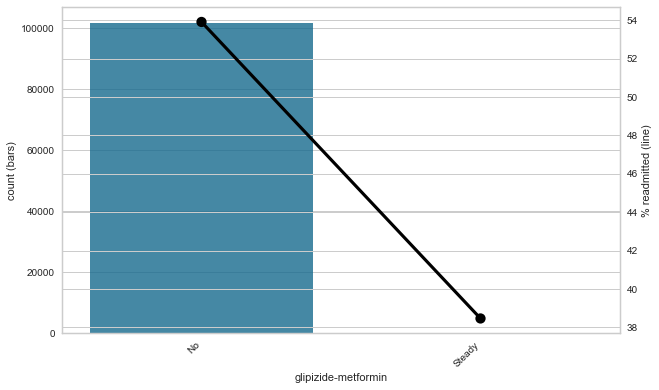

  glimepiride-pioglitazone        <30         NO   count
0                       No  11.160026  53.912445  101765
1                   Steady   0.000000   0.000000       1


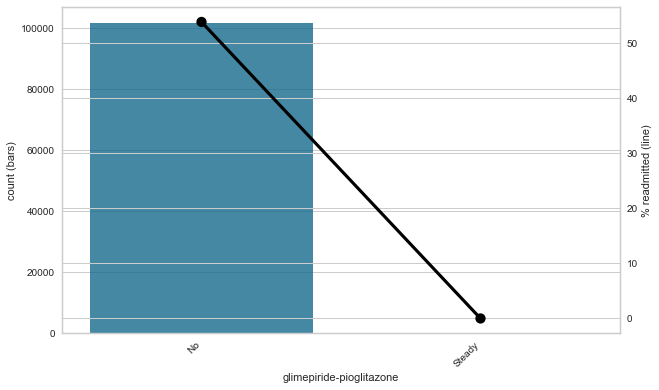

  metformin-rosiglitazone        <30         NO   count
0                      No  11.160135   53.91101  101764
1                  Steady   0.000000  100.00000       2


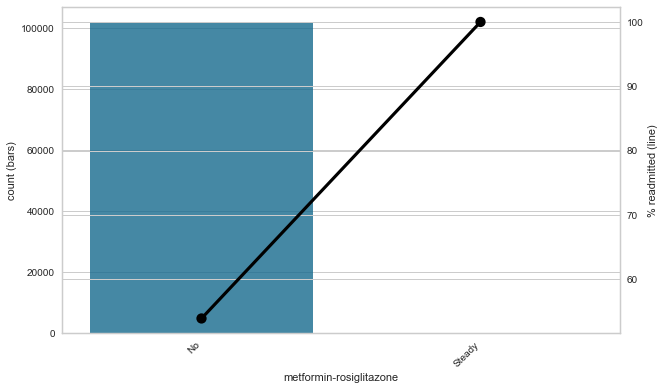

  metformin-pioglitazone        <30          NO   count
0                     No  11.160026   53.911463  101765
1                 Steady   0.000000  100.000000       1


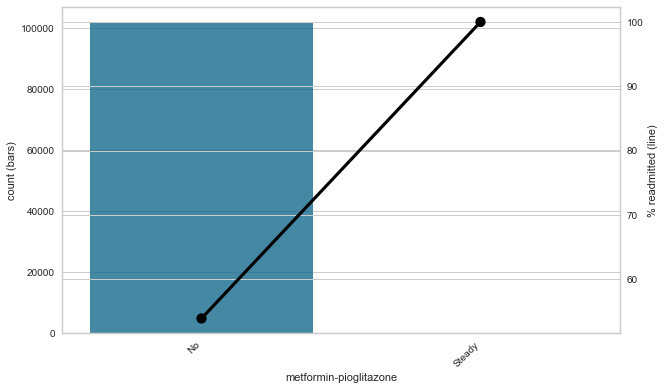

  change        <30         NO  count
0     No  10.590814  56.036892  54755
1     Ch  11.822765  51.436898  47011


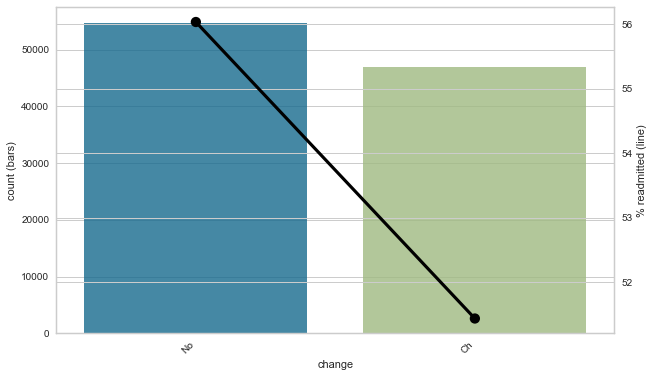

  diabetesMed        <30         NO  count
0         Yes  11.626661  52.236387  78363
1          No   9.597060  59.522283  23403


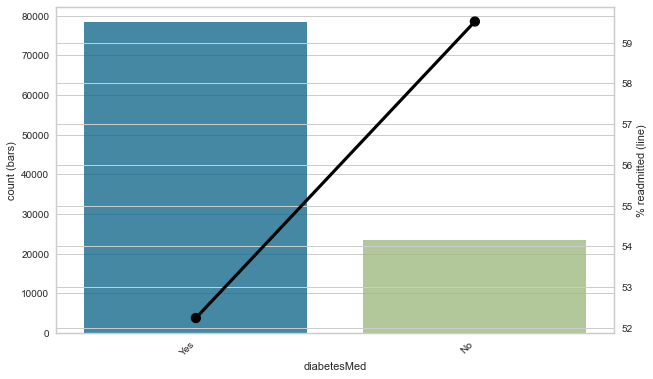

In [19]:
categorial_feature_count = len(categorical_features)
plt.figure(figsize=(10, 6*categorial_feature_count))
for feature in categorical_features:
    categorical_explanatory_binary_response_chart(df, feature, 'readmitted')

#### Separate different Variable Types 

#### Dummy Code Categorical Variables 

#### Scale the Numerical Variables 

#### Get the final dataset ready to model 

#### Split datasets into training and testing 

#### Fit initial logistic regression model 

#### Get important features 

#### Perform hyperparameter tunning 

#### Cross validation 

#### Get prediction on test set 

#### Evaluate the model 
  - Accuracy
  - Precision and Recall
  - ROC curve 
  

#### Interpret the Result 